# Car price prediction modeling

---

## Patrick Parsa

### Dataset scraped from local car website

**Importing packages and initial data overview**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/Users/patrick/Documents/ML model deployment/multi_page_car.xlsx')
df.head()

,Name,Mileage,Price
0,2012 Lexus LS 460 Base,"56,638 mi.","$29,995"
1,2019 Chrysler Pacifica Limited,"87,998 mi.","$33,900"
2,2019 Subaru Outback 3.6R Limited,"50,450 mi.","$32,553"
3,2021 Subaru WRX Premium,"1,552 mi.","$37,538"
4,2020 Subaru Outback Premium,"14,809 mi.","$26,200"


In [4]:
df.shape

(9982, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     9982 non-null   object
 1   Mileage  9982 non-null   object
 2   Price    9982 non-null   object
dtypes: object(3)
memory usage: 234.1+ KB


In [6]:
df.dtypes

Name       object
Mileage    object
Price      object
dtype: object

In [7]:
#missing values
df.isna().sum()

Name       0
Mileage    0
Price      0
dtype: int64

## Data cleaning and feature engineering
---

### Steps:

* Filtering to only contain desired models (Civic, Accord, Corolla, Camry)
* Filtering out fully-optional models
* Converting Price column into integer and removing dollar sign and comma
* Converting mileage into integer and removing 'mi' and comma
* Creating new column 'Year'
* Converting 'Year' into an integer and then using that to create new column 'Age'

Creating new column: **Year**

In [8]:
df['Year'] = df.Name.str[:4]

In [9]:
df.head()

,Name,Mileage,Price,Year
0,2012 Lexus LS 460 Base,"56,638 mi.","$29,995",2012
1,2019 Chrysler Pacifica Limited,"87,998 mi.","$33,900",2019
2,2019 Subaru Outback 3.6R Limited,"50,450 mi.","$32,553",2019
3,2021 Subaru WRX Premium,"1,552 mi.","$37,538",2021
4,2020 Subaru Outback Premium,"14,809 mi.","$26,200",2020


Creating new column: **Age**

In [10]:
df['Year'] = df['Year'].astype(str).astype(int)

In [11]:
df.dtypes

Name       object
Mileage    object
Price      object
Year        int64
dtype: object

In [12]:
df['Age'] = 2022 - df['Year']
df

,Name,Mileage,Price,Year,Age
0,2012 Lexus LS 460 Base,"56,638 mi.","$29,995",2012,10
1,2019 Chrysler Pacifica Limited,"87,998 mi.","$33,900",2019,3
2,2019 Subaru Outback 3.6R Limited,"50,450 mi.","$32,553",2019,3
3,2021 Subaru WRX Premium,"1,552 mi.","$37,538",2021,1
4,2020 Subaru Outback Premium,"14,809 mi.","$26,200",2020,2
...,...,...,...,...,...
9977,2018 Ford Explorer Platinum,"24,553 mi.","$39,990",2018,4
9978,2018 INFINITI Q60 3.0t LUXE,"65,182 mi.","$32,989",2018,4
9979,2020 Honda CR-V EX,"33,808 mi.","$30,499",2020,2
9980,2013 Chevrolet Camaro 2LS,"63,296 mi.","$17,899",2013,9


**Removing unecessary Symbols from Price and converting to int**

In [13]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(int)

In [14]:
df.head()

,Name,Mileage,Price,Year,Age
0,2012 Lexus LS 460 Base,"56,638 mi.",29995,2012,10
1,2019 Chrysler Pacifica Limited,"87,998 mi.",33900,2019,3
2,2019 Subaru Outback 3.6R Limited,"50,450 mi.",32553,2019,3
3,2021 Subaru WRX Premium,"1,552 mi.",37538,2021,1
4,2020 Subaru Outback Premium,"14,809 mi.",26200,2020,2


**Same process for mileage** 

In [15]:
df['Mileage'] = df['Mileage'].str.replace(',','')
df['Mileage'] = df['Mileage'].str.replace(' mi.','')
df.head()

,Name,Mileage,Price,Year,Age
0,2012 Lexus LS 460 Base,56638,29995,2012,10
1,2019 Chrysler Pacifica Limited,87998,33900,2019,3
2,2019 Subaru Outback 3.6R Limited,50450,32553,2019,3
3,2021 Subaru WRX Premium,1552,37538,2021,1
4,2020 Subaru Outback Premium,14809,26200,2020,2


In [16]:
df['Mileage'] = df['Mileage'].astype(int)
df.dtypes

Name       object
Mileage     int64
Price       int64
Year        int64
Age         int64
dtype: object

Saving df before filtering to only include targeted models, in case we want to build a project with other makes and models in the future. 

In [17]:
original_df = df

**Categorizing for targeted models (Civic, Accord, Corolla, Camry)**

In [18]:
df.loc[df['Name'].str.contains('Civic'), 'Model'] = 'Civic'
df.loc[df['Name'].str.contains('Accord'), 'Model'] = 'Accord'
df.loc[df['Name'].str.contains('Corolla'), 'Model'] = 'Corolla'
df.loc[df['Name'].str.contains('Camry'), 'Model'] = 'Camry'
df.head()

,Name,Mileage,Price,Year,Age,Model
0,2012 Lexus LS 460 Base,56638,29995,2012,10,NaN
1,2019 Chrysler Pacifica Limited,87998,33900,2019,3,NaN
2,2019 Subaru Outback 3.6R Limited,50450,32553,2019,3,NaN
3,2021 Subaru WRX Premium,1552,37538,2021,1,NaN
4,2020 Subaru Outback Premium,14809,26200,2020,2,NaN


In [19]:
df = df.dropna()

In [20]:
df.head()

,Name,Mileage,Price,Year,Age,Model
14,2020 Honda Accord LX 1.5T,10949,24995,2020,2,Accord
16,2019 Honda Accord Sport 2.0T,45157,24300,2019,3,Accord
20,2019 Honda Civic Sport,32717,20550,2019,3,Civic
34,2019 Toyota Camry LE,16838,25995,2019,3,Camry
42,2021 Toyota Camry XSE,30434,37518,2021,1,Camry


In [21]:
df.Name.unique()

array(['2020 Honda Accord LX 1.5T', '2019 Honda Accord Sport 2.0T',
       '2019 Honda Civic Sport', '2019 Toyota Camry LE',
       '2021 Toyota Camry XSE', '2021 Honda Civic Sport',
       '2020 Honda Civic Sport', '2015 Honda Accord EX-L',
       '2020 Honda Accord Sport 1.5T', '2020 Toyota Corolla LE',
       '2019 Toyota Camry SE', '2019 Toyota Corolla LE',
       '2022 Toyota Corolla LE', '2016 Toyota Corolla L',
       '2019 Toyota Camry XSE', '2020 Toyota Camry LE',
       '2020 Toyota Camry XSE', '2021 Toyota Camry LE',
       '2021 Honda Accord EX-L', '2016 Honda Accord EX-L',
       '2020 Honda Civic EX', '2019 Honda Civic EX',
       '2020 Honda Civic LX', '2019 Honda Accord EX-L',
       '2017 Toyota Camry SE', '2020 Honda Civic Si Base',
       '2020 Toyota Corolla SE', '2021 Toyota Corolla LE',
       '2017 Toyota Corolla LE', '2019 Honda Civic LX',
       '2021 Honda Accord Sport SE', '2017 Honda Accord EX-L',
       '2021 Honda Accord Sport 1.5T', '2021 Toyota Corolla S

**Filtering out full-options models**

In [22]:
#For Civic
df.loc[df['Name'].str.contains('Si'), 'Full options'] = 'Yes'

#For Accord
df.loc[df['Name'].str.contains('Touring'), 'Full options'] = 'Yes'
df.loc[df['Name'].str.contains('Touring 2.0'), 'Full options'] = 'Yes'
df.loc[df['Name'].str.contains('Sport 2.0'), 'Full options'] = 'Yes'

#For Corolla
df.loc[df['Name'].str.contains('XSE'), 'Full options'] = 'Yes'

#For Camry
df.loc[df['Name'].str.contains('XLE'), 'Full options'] = 'Yes'

#filtering out hybrids
df.loc[df['Name'].str.contains('Hybrid'), 'Full options'] = 'Yes'

In [23]:
df.head()

,Name,Mileage,Price,Year,Age,Model,Full options
14,2020 Honda Accord LX 1.5T,10949,24995,2020,2,Accord,NaN
16,2019 Honda Accord Sport 2.0T,45157,24300,2019,3,Accord,Yes
20,2019 Honda Civic Sport,32717,20550,2019,3,Civic,NaN
34,2019 Toyota Camry LE,16838,25995,2019,3,Camry,NaN
42,2021 Toyota Camry XSE,30434,37518,2021,1,Camry,Yes


In [24]:
df = df.loc[(df['Full options'] != 'Yes')]

In [25]:
df.head()

,Name,Mileage,Price,Year,Age,Model,Full options
14,2020 Honda Accord LX 1.5T,10949,24995,2020,2,Accord,NaN
20,2019 Honda Civic Sport,32717,20550,2019,3,Civic,NaN
34,2019 Toyota Camry LE,16838,25995,2019,3,Camry,NaN
47,2021 Honda Civic Sport,13904,27161,2021,1,Civic,NaN
56,2020 Honda Civic Sport,28400,21550,2020,2,Civic,NaN


In [26]:
df['Model'].value_counts()

Accord     186
Civic      165
Camry      161
Corolla    147
Name: Model, dtype: int64

In [27]:
df = df.drop('Full options',1)

In [28]:
df.head()

,Name,Mileage,Price,Year,Age,Model
14,2020 Honda Accord LX 1.5T,10949,24995,2020,2,Accord
20,2019 Honda Civic Sport,32717,20550,2019,3,Civic
34,2019 Toyota Camry LE,16838,25995,2019,3,Camry
47,2021 Honda Civic Sport,13904,27161,2021,1,Civic
56,2020 Honda Civic Sport,28400,21550,2020,2,Civic


**Statistical Summary**

In [29]:
df.describe()

,Mileage,Price,Year,Age
count,659.000000,659.000000,659.000000,659.000000
mean,50273.792109,22643.986343,2017.663126,4.336874
std,37663.800851,5663.732070,3.304049,3.304049
min,306.000000,3995.000000,2000.000000,0.000000
25%,23917.500000,19032.000000,2016.000000,2.000000
50%,41531.000000,22990.000000,2019.000000,3.000000
75%,67191.500000,26495.000000,2020.000000,6.000000
max,274166.000000,39485.000000,2022.000000,22.000000


## EDA

In [30]:
final_dataset = df[['Mileage','Price','Model','Age']]
final_dataset.head()

,Mileage,Price,Model,Age
14,10949,24995,Accord,2
20,32717,20550,Civic,3
34,16838,25995,Camry,3
47,13904,27161,Civic,1
56,28400,21550,Civic,2


In [31]:
final_dataset = final_dataset.reset_index()

In [32]:
final_dataset.head()

,index,Mileage,Price,Model,Age
0,14,10949,24995,Accord,2
1,20,32717,20550,Civic,3
2,34,16838,25995,Camry,3
3,47,13904,27161,Civic,1
4,56,28400,21550,Civic,2


In [33]:
final_dataset = final_dataset.drop('index',1)

In [34]:
final_dataset.head()

,Mileage,Price,Model,Age
0,10949,24995,Accord,2
1,32717,20550,Civic,3
2,16838,25995,Camry,3
3,13904,27161,Civic,1
4,28400,21550,Civic,2


### Univariate Analysis

**Categorical columns:**

In [35]:
import seaborn as sns

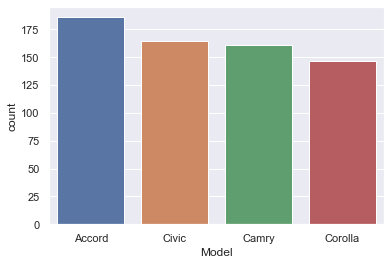

In [36]:
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(x='Model',data=final_dataset)

**Numerical columns**

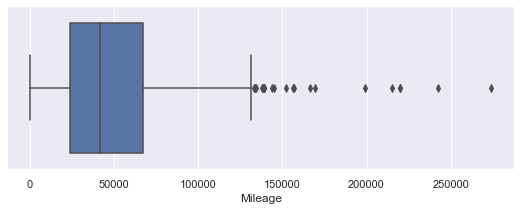

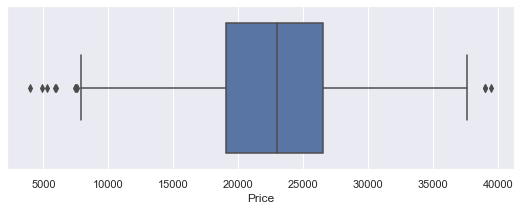

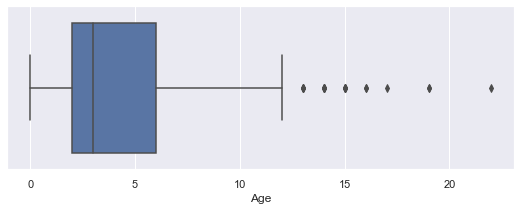

In [37]:
num_cols = ['Mileage','Price','Age']
i=0
while i < 3:
    fig = plt.figure(figsize=[20,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=final_dataset)
    i += 1
    
    
    
    plt.show()

**Bivariate/Multi-Variate Analysis**

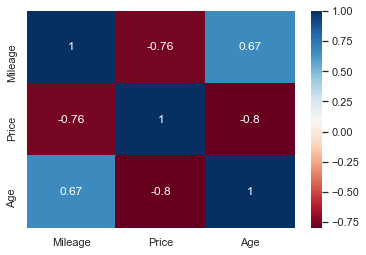

In [38]:
sns.heatmap(final_dataset.corr(), annot=True, cmap="RdBu")
plt.show()

In [39]:
final_dataset.corr()['Price']

Mileage   -0.761895
Price      1.000000
Age       -0.801688
Name: Price, dtype: float64

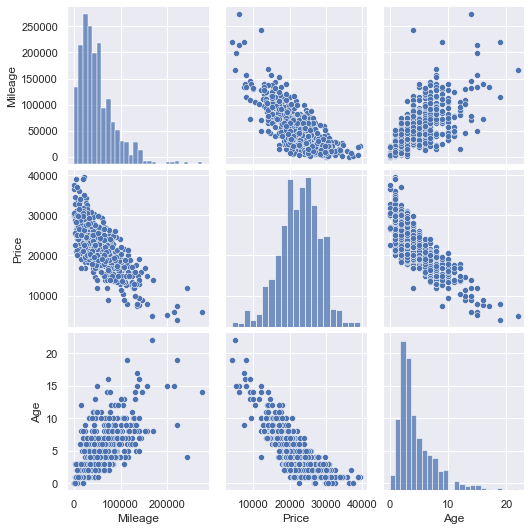

In [40]:
sns.pairplot(final_dataset)

## Modeling

In [41]:
backup = final_dataset

In [42]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [43]:
final_dataset.head()

,Mileage,Price,Age,Model_Camry,Model_Civic,Model_Corolla
0,10949,24995,2,0,0,0
1,32717,20550,3,0,1,0
2,16838,25995,3,1,0,0
3,13904,27161,1,0,1,0
4,28400,21550,2,0,1,0


Convert to csv

In [65]:
final_dataset.to_csv('cars_real.csv')

In [44]:
first_column = final_dataset.pop('Price')
final_dataset.insert(0,'Price',first_column)
final_dataset.head()

,Price,Mileage,Age,Model_Camry,Model_Civic,Model_Corolla
0,24995,10949,2,0,0,0
1,20550,32717,3,0,1,0
2,25995,16838,3,1,0,0
3,27161,13904,1,0,1,0
4,21550,28400,2,0,1,0


In [45]:
##independent and dependent features
X = final_dataset.iloc[:,1:]
y= final_dataset.iloc[:,0]
X.head()

,Mileage,Age,Model_Camry,Model_Civic,Model_Corolla
0,10949,2,0,0,0
1,32717,3,0,1,0
2,16838,3,1,0,0
3,13904,1,0,1,0
4,28400,2,0,1,0


In [46]:
y.head()

0    24995
1    20550
2    25995
3    27161
4    21550
Name: Price, dtype: int64

In [47]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor() 
model.fit(X,y)

ExtraTreesRegressor()

In [48]:
print(model.feature_importances_)

[0.35397412 0.51384411 0.01508371 0.02670929 0.09038877]


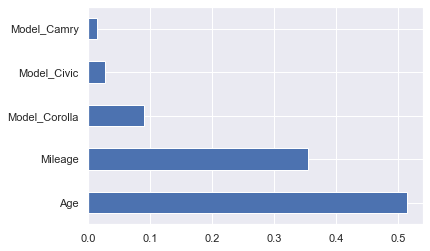

In [49]:
#Graph of feature importances
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [51]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (527, 5)
x test:  (132, 5)
y train:  (527,)
y test:  (132,)


### Model Creation/Evaluation

**Applying regression models**
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
5. Gradient Boosting regression

In [52]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [53]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

#### Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.86
Test R2-score : 0.84
Train CV scores : [0.83672871 0.883068   0.83840215 0.83857022 0.88146958]
Train CV mean : 0.86


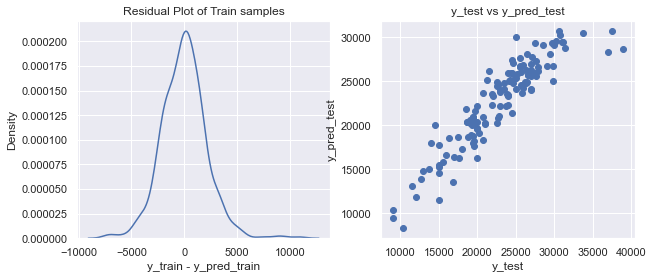

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

#### Ridge

Train R2-score : 0.86
Test R2-score : 0.84
Train CV scores : [0.83693871 0.88297432 0.83840044 0.83857253 0.88146894]
Train CV mean : 0.86


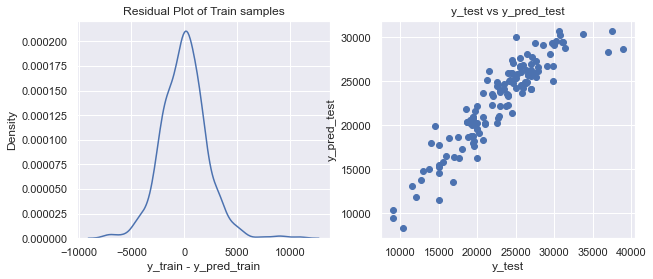

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

#### Lasso

In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.86
Test R2-score : 0.84
Train CV scores : [0.83711655 0.88293283 0.83840209 0.83857036 0.88146949]
Train CV mean : 0.86


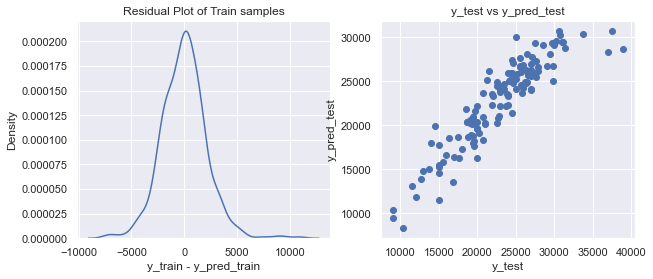

In [57]:
car_pred_model(ls_rs,"lasso.pkl")

In [58]:
Technique = ["LinearRegression","Ridge","Lasso"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)


,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.86,0.84,0.86
1,Ridge,0.86,0.84,0.86
2,Lasso,0.86,0.84,0.86


In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
predictions = lr.predict(X_test)

In [61]:
predictions

array([20611.24754132, 25040.77589501, 25944.02426259, 22204.13965695,
       26803.04446038, 28680.77760594, 18744.38044784, 26316.10285368,
       20938.58089725, 24757.79000962, 20266.82576973, 25058.91058583,
       15779.02554773, 21829.58612887, 14748.54608628, 21102.90802809,
       28352.11284092,  9455.33875098, 26994.0605644 , 20291.76335027,
       19601.33417928, 23311.14094235, 24166.19078812, 20884.92357634,
       26220.38017136, 18034.87819759,  8263.49357576, 26022.65709085,
       24818.33161655, 24486.67671636, 26275.13060141, 25969.46622699,
       26064.25526483, 25949.96149225, 26744.39256031, 20327.36924385,
       18230.25821509, 20829.30748623, 24188.60355372, 15287.54014281,
       20357.41889602, 30076.50938122, 10390.76712663, 24057.20495899,
       27270.87061861, 11851.94732902, 17594.01190875, 27480.2436674 ,
       30234.69083736, 17782.22810788, 23531.14624457, 26171.20569478,
       29139.51947332, 16418.6969503 , 21667.66524258, 13527.31912101,
      

<AxesSubplot:xlabel='Price', ylabel='Count'>

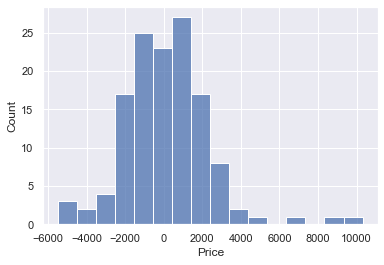

In [62]:
sns.histplot(y_test-predictions)

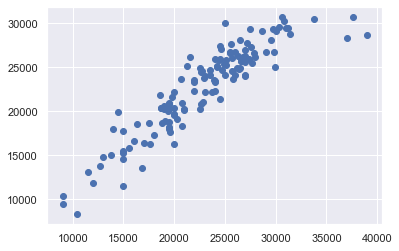

In [63]:
plt.scatter(y_test,predictions)

In [66]:
import pickle
#opening a file, where I want to store the data
file = open('linear_regression_model1.pkl','wb')

#dumping information to that file
pickle.dump(lr,file)

In [68]:
pickle.dump(lr,open('lr_model.pkl','wb'))